# Capstone Project - Car accident severity (Week 2)

## Applied Data Science Capstone by IBM/Coursera


### 1. Introduction
#### 1.1 Background
Accidents has little to high impact on other people travelling to/through that particular location. So if we can predict accident severity based on past data about weather/location/time, people can accordingly plan their travel carefully. And lot of traffic jam can also be avoided.

#### 1.2 Problem/Idea
Based on past data which has Weather/Road/location/time conditions we can predict accident severity So that commuter can change travel plans accordingly. And hence travel safe. Infact accidents can also be prevented if one knows about such information report from past in some kind of app or from news.

#### 2. Data
Data to be utilized is from Seattle police department with date range from Jan 2004 to May 2020. This data will be used to test a maching learning model to predict accident severity code 1 described as "Property Damage Only Collision" and severity code 2 described as "Injury Collision"

Data parameters like location and weather can be used to predict where more number of accidents happened in the past and with what type of severity. And to get more specific like Alley, Intersection or Block we can use Address Type field. Junction type like "Mid-Block (not related to intersection)" will give more such information. Similarly Intersection key INTKEY can be used which corresponds to the intersection associated with a collision. Collision code can be used to get accidents with such same collision descriptions like "MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END". Further we can use Weather, Road condition & Light conditions parameters (like Overcast, Dry & Daylight) to see come up with such type of predictions. ST_COLCODE can be used to get more details about description by state's code designation for example "One parked--one moving".

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Below is added by IBM cloud while file was inserted.
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_42513a018e50476d9c6848026b16efb3 = ibm_boto3.client(service_name='s3',
   # ibm_api_key_id= cleared private api key so use one created from your IBM cloud account,
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_42513a018e50476d9c6848026b16efb3.get_object(Bucket='courseracapstoneibmcloud-donotdelete-pr-h136zl0aey6ktg',Key='Data-Collisions.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()
#df_collision_data_1 = pd.read_csv(body)
#df_collision_data_1.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [2]:

#import pylab as pl
#import numpy as np
#import scipy.optimize as opt
#from sklearn import preprocessing
#from sklearn.model_selection import train_test_split
#%matplotlib inline 
#import matplotlib.pyplot as plt

#ax = df_data_1[df_data_1['SEVERITYCODE'] == 4][0:50].plot(kind='scatter', x='INTKEY', y='SDOTCOLNUM', color='DarkBlue', label='1');
#df_data_1[df_data_1['SEVERITYCODE'] == 2][0:50].plot(kind='scatter', x='INTKEY', y='SDOTCOLNUM', color='Yellow', label='2', ax=ax);
#plt.show()

In [3]:
df=df_data_1.copy()

print(df.shape)

def helper(col):
    print(df[col].unique())
    print(df[col].count())
    print(df[col].isnull().sum())
    
helper('UNDERINFL')

(194673, 38)
['N' '0' nan '1' 'Y']
189789
4884



Identifying the Null Values in Dataset

In [4]:
df.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

In [5]:

#dropping the NAN
df.dropna(subset=['UNDERINFL','JUNCTIONTYPE','WEATHER','ROADCOND','LIGHTCOND','COLLISIONTYPE'],inplace=True)

In [6]:
# Replacing Nan with N values
df['SPEEDING'].fillna("N",inplace=True)
df['INATTENTIONIND'].fillna("N",inplace=True)

In [7]:
df.head(1)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.70314,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,N,10,Entering at angle,0,0,N


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SEVERITYCODE,183177.0,1.309296e+00,4.622049e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00
X,180067.0,-1.223305e+02,2.997735e-02,-1.224191e+02,-1.223486e+02,-1.223302e+02,-1.223119e+02,-1.222389e+02
Y,180067.0,4.761950e+01,5.633115e-02,4.749557e+01,4.757558e+01,4.761528e+01,4.766394e+01,4.773414e+01
OBJECTID,183177.0,1.059971e+05,6.260997e+04,1.000000e+00,5.175400e+04,1.022430e+05,1.596390e+05,2.195470e+05
INCKEY,183177.0,1.375858e+05,8.592287e+04,1.001000e+03,6.765700e+04,1.185010e+05,1.983990e+05,3.313420e+05
COLDETKEY,183177.0,1.377816e+05,8.626350e+04,1.001000e+03,6.765700e+04,1.185010e+05,1.985390e+05,3.328420e+05
INTKEY,63298.0,3.749370e+04,5.131956e+04,2.380700e+04,2.866600e+04,2.997300e+04,3.398400e+04,7.575800e+05
SEVERITYCODE.1,183177.0,1.309296e+00,4.622049e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00
PERSONCOUNT,183177.0,2.475693e+00,1.370376e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,8.100000e+01
PEDCOUNT,183177.0,3.894594e-02,2.028340e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00


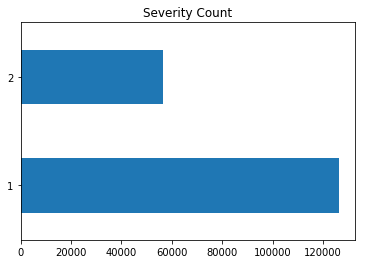

In [9]:
df['SEVERITYCODE'].value_counts().plot(kind='barh')
plt.title("Severity Count")
plt.show()

Data Cleaning

In [10]:
df_selected=df[['OBJECTID','STATUS','COLLISIONTYPE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','INATTENTIONIND','WEATHER','UNDERINFL','ROADCOND','LIGHTCOND','SPEEDING','SEVERITYCODE']]

In [11]:

print(df_selected.shape)

(183177, 14)


In [12]:
df_selected['UNDERINFL'].replace('N','0',inplace=True)
helper('UNDERINFL')

df_selected['INATTENTIONIND'].replace('N','0',inplace=True)
helper('INATTENTIONIND')

df_selected['SPEEDING'].replace('N','0',inplace=True)
helper('SPEEDING')
df_selected['UNDERINFL'].replace('Y','1',inplace=True)
helper('UNDERINFL')

df_selected['INATTENTIONIND'].replace('Y','1',inplace=True)
helper('INATTENTIONIND')

df_selected['SPEEDING'].replace('Y','1',inplace=True)
helper('SPEEDING')

df_selected['STATUS'].replace('Matched','1',inplace=True)
helper('STATUS')
df_selected['STATUS'].replace('Unmatched','0',inplace=True)
helper('STATUS')

['N' '0' '1' 'Y']
183177
0
['N' 'Y']
183177
0


/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


['N' 'Y']
183177
0
['N' '0' '1' 'Y']
183177
0
['N' 'Y']
183177
0
['N' 'Y']
183177
0
['Matched' 'Unmatched']
183177
0
['Matched' 'Unmatched']
183177
0


In [13]:
df_selected['SPEEDING']=df_selected['SPEEDING'].astype(int)
df_selected['UNDERINFL']=df_selected['UNDERINFL'].astype(int)
df_selected['INATTENTIONIND']=df_selected['INATTENTIONIND'].astype(int)
df_selected['STATUS']=df_selected['STATUS'].astype(int)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [14]:
df_selected.dtypes

OBJECTID           int64
STATUS             int64
COLLISIONTYPE     object
PERSONCOUNT        int64
PEDCOUNT           int64
PEDCYLCOUNT        int64
VEHCOUNT           int64
INATTENTIONIND     int64
WEATHER           object
UNDERINFL          int64
ROADCOND          object
LIGHTCOND         object
SPEEDING           int64
SEVERITYCODE       int64
dtype: object

In [15]:
helper('STATUS')

['Matched' 'Unmatched']
183177
0


In [16]:
helper('COLLISIONTYPE')

['Angles' 'Sideswipe' 'Parked Car' 'Other' 'Cycles' 'Rear Ended' 'Head On'
 'Left Turn' 'Pedestrian' 'Right Turn']
183177
0


In [17]:

df_selected.head(5)

,OBJECTID,STATUS,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,WEATHER,UNDERINFL,ROADCOND,LIGHTCOND,SPEEDING,SEVERITYCODE
0,1,1,Angles,2,0,0,2,0,Overcast,0,Wet,Daylight,0,2
1,2,1,Sideswipe,2,0,0,2,0,Raining,0,Wet,Dark - Street Lights On,0,1
2,3,1,Parked Car,4,0,0,3,0,Overcast,0,Dry,Daylight,0,1
3,4,1,Other,3,0,0,3,0,Clear,0,Dry,Daylight,0,1
4,5,1,Angles,2,0,0,2,0,Raining,0,Wet,Daylight,0,2


Understanding Data Correleation

In [18]:
df_corr=df_selected.corr(method='pearson')

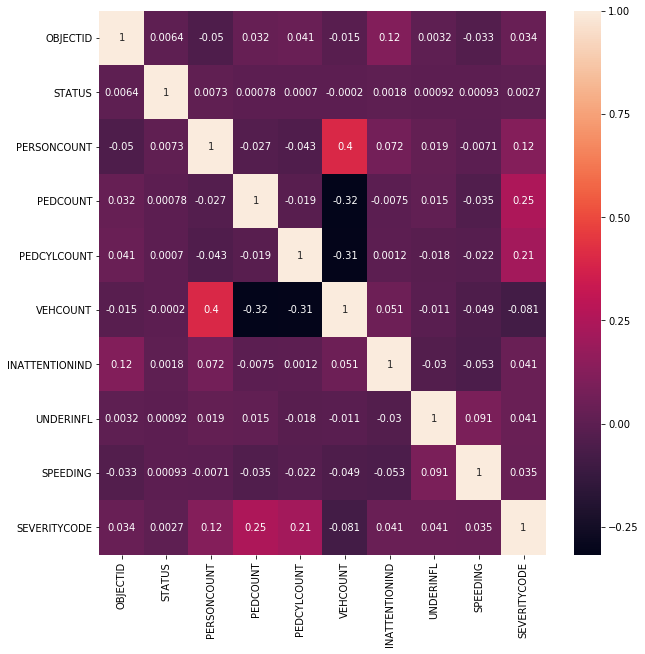

In [19]:

plt.figure(figsize=(10,10))
sns.heatmap(df_corr,annot=True)
plt.show()

Box Plot to understande the data & Outliers

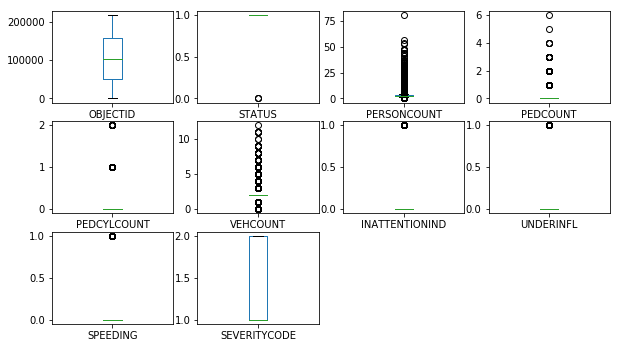

In [20]:

df_selected.plot(kind='box',subplots=True,layout=(10,4),sharex=False,sharey=False,figsize=(10,20))
plt.show()

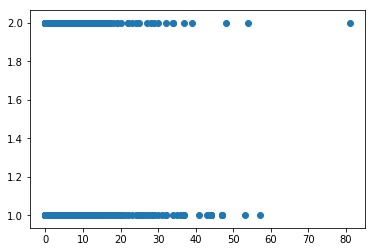

In [21]:
x=df_selected[['PERSONCOUNT']]
y=df_selected[['SEVERITYCODE']]
plt.scatter(x, y)
plt.show()

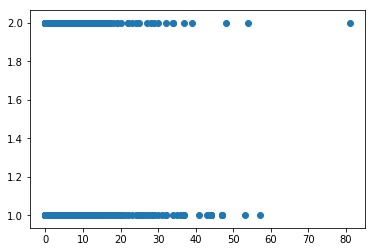

In [22]:
y=df_selected[['SEVERITYCODE']]
plt.scatter(x, y)
plt.show()

One Hot encoding for categorical data using get dummies function

In [23]:
df_weather = pd.get_dummies(df_selected['WEATHER'], prefix='WEATHER')

df_road = pd.get_dummies(df_selected['ROADCOND'], prefix='ROADCOND')
df_light = pd.get_dummies(df_selected['LIGHTCOND'], prefix='LIGHTCOND')

df_coll = pd.get_dummies(df_selected['COLLISIONTYPE'], prefix='COLLISIONTYPE')

df_selected.drop(['LIGHTCOND','ROADCOND','WEATHER','COLLISIONTYPE'],axis=1,inplace=True)
df_selected.head(1)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,OBJECTID,STATUS,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,SPEEDING,SEVERITYCODE
0,1,1,2,0,0,2,0,0,0,2


In [24]:
df_coll.head(1)
#df_selected['WEATHER'].unique()

,COLLISIONTYPE_Angles,COLLISIONTYPE_Cycles,COLLISIONTYPE_Head On,COLLISIONTYPE_Left Turn,COLLISIONTYPE_Other,COLLISIONTYPE_Parked Car,COLLISIONTYPE_Pedestrian,COLLISIONTYPE_Rear Ended,COLLISIONTYPE_Right Turn,COLLISIONTYPE_Sideswipe
0,1,0,0,0,0,0,0,0,0,0


In [25]:
df_fin=pd.concat([df_selected,df_weather,df_road,df_light,df_coll],axis=1)

df_fin.head(1)

,OBJECTID,STATUS,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,SPEEDING,SEVERITYCODE,...,COLLISIONTYPE_Angles,COLLISIONTYPE_Cycles,COLLISIONTYPE_Head On,COLLISIONTYPE_Left Turn,COLLISIONTYPE_Other,COLLISIONTYPE_Parked Car,COLLISIONTYPE_Pedestrian,COLLISIONTYPE_Rear Ended,COLLISIONTYPE_Right Turn,COLLISIONTYPE_Sideswipe
0,1,1,2,0,0,2,0,0,0,2,...,1,0,0,0,0,0,0,0,0,0


In [26]:
df_fin.describe()

,OBJECTID,STATUS,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,SPEEDING,SEVERITYCODE,...,COLLISIONTYPE_Angles,COLLISIONTYPE_Cycles,COLLISIONTYPE_Head On,COLLISIONTYPE_Left Turn,COLLISIONTYPE_Other,COLLISIONTYPE_Parked Car,COLLISIONTYPE_Pedestrian,COLLISIONTYPE_Rear Ended,COLLISIONTYPE_Right Turn,COLLISIONTYPE_Sideswipe
count,183177.000000,183177.000000,183177.000000,183177.000000,183177.000000,183177.000000,183177.000000,183177.000000,183177.000000,183177.000000,...,183177.000000,183177.000000,183177.000000,183177.000000,183177.000000,183177.000000,183177.000000,183177.000000,183177.000000,183177.000000
mean,105997.064451,0.999984,2.475693,0.038946,0.029802,1.971918,0.159622,0.049144,0.050274,1.309296,...,0.188146,0.029289,0.010897,0.074469,0.125556,0.236231,0.035567,0.183882,0.015995,0.099969
std,62609.967375,0.004047,1.370376,0.202834,0.171352,0.563012,0.366256,0.216169,0.218510,0.462205,...,0.390830,0.168615,0.103817,0.262533,0.331349,0.424767,0.185208,0.387389,0.125458,0.299959
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51754.000000,1.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,102243.000000,1.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,159639.000000,1.000000,3.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,219547.000000,1.000000,81.000000,6.000000,2.000000,12.000000,1.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Final Selected Features

In [27]:
df_target=pd.DataFrame(df_fin[['SEVERITYCODE']])
df_fin.drop('SEVERITYCODE',axis=1,inplace=True)
df_features=df_fin
df_features.head(1)

,OBJECTID,STATUS,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,SPEEDING,WEATHER_Blowing Sand/Dirt,...,COLLISIONTYPE_Angles,COLLISIONTYPE_Cycles,COLLISIONTYPE_Head On,COLLISIONTYPE_Left Turn,COLLISIONTYPE_Other,COLLISIONTYPE_Parked Car,COLLISIONTYPE_Pedestrian,COLLISIONTYPE_Rear Ended,COLLISIONTYPE_Right Turn,COLLISIONTYPE_Sideswipe
0,1,1,2,0,0,2,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [28]:
df_target.head(1)

,SEVERITYCODE
0,2


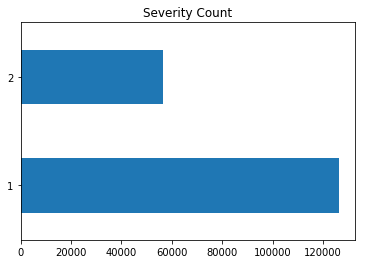

In [29]:
df_target['SEVERITYCODE'].value_counts().plot(kind='barh')
plt.title("Severity Count")
plt.show()

Balancing dataset using imblearn

In [30]:
!pip install imblearn

     |████████████████████████████████| 174kB 11.4MB/s eta 0:00:01
     |████████████████████████████████| 307kB 26.5MB/s eta 0:00:01
     |████████████████████████████████| 6.8MB 29.4MB/s eta 0:00:01     |█████████████████▉              | 3.8MB 29.4MB/s eta 0:00:01
ERROR: autoai-libs 1.10.5 has requirement numpy>=1.16.4, but you'll have numpy 1.15.4 which is incompatible.
ERROR: autoai-libs 1.10.5 has requirement pandas>=0.24.2, but you'll have pandas 0.24.1 which is incompatible.
ERROR: autoai-libs 1.10.5 has requirement scikit-learn==0.20.3, but you'll have scikit-learn 0.23.2 which is incompatible.
  Found existing installation: scikit-learn 0.20.3
    Uninstalling scikit-learn-0.20.3:
      Successfully uninstalled scikit-learn-0.20.3


In [31]:

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
r=RandomUnderSampler(sampling_strategy=0.5)
df_features,df_target=r.fit_resample(df_features,df_target)


r=RandomOverSampler(sampling_strategy=1.0)
df_features,df_target=r.fit_resample(df_features,df_target)


df_target['SEVERITYCODE'].value_counts()

2    113312
1    113312
Name: SEVERITYCODE, dtype: int64

Train Test split

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df_features, df_target, test_size=0.33, random_state=42)


X_train.shape


(151838, 48)

Classification using Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(max_depth=15, random_state=0,n_estimators=100,max_features=20
                            )
clf.fit(X_train, y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier(max_depth=15, max_features=20, random_state=0)

Prediction on the test data

In [34]:
y_pred=clf.predict(X_test)

Accuracy Scores

In [35]:

from sklearn.metrics import accuracy_score
from sklearn import metrics 
metrics.accuracy_score(y_test, y_pred)

0.7156152221003931

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[22183, 15077],
       [ 6191, 31335]])

In [37]:
from sklearn.metrics import classification_report
target_names = ['class 1', 'class 2']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 1       0.78      0.60      0.68     37260
     class 2       0.68      0.84      0.75     37526

    accuracy                           0.72     74786
   macro avg       0.73      0.72      0.71     74786
weighted avg       0.73      0.72      0.71     74786

